In [73]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dropout
import warnings

warnings.filterwarnings("ignore")

In [74]:
data = pd.read_csv('Churn_Modelling.csv')
data.info(), data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


(None,
 RowNumber          0
 CustomerId         0
 Surname            0
 CreditScore        0
 Geography          0
 Gender             0
 Age                0
 Tenure             0
 Balance            0
 NumOfProducts      0
 HasCrCard          0
 IsActiveMember     0
 EstimatedSalary    0
 Exited             0
 dtype: int64)

In [75]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Geography'] = le.fit_transform(data['Geography'])
data['Gender'] = le.fit_transform(data['Gender'])
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


<AxesSubplot: >

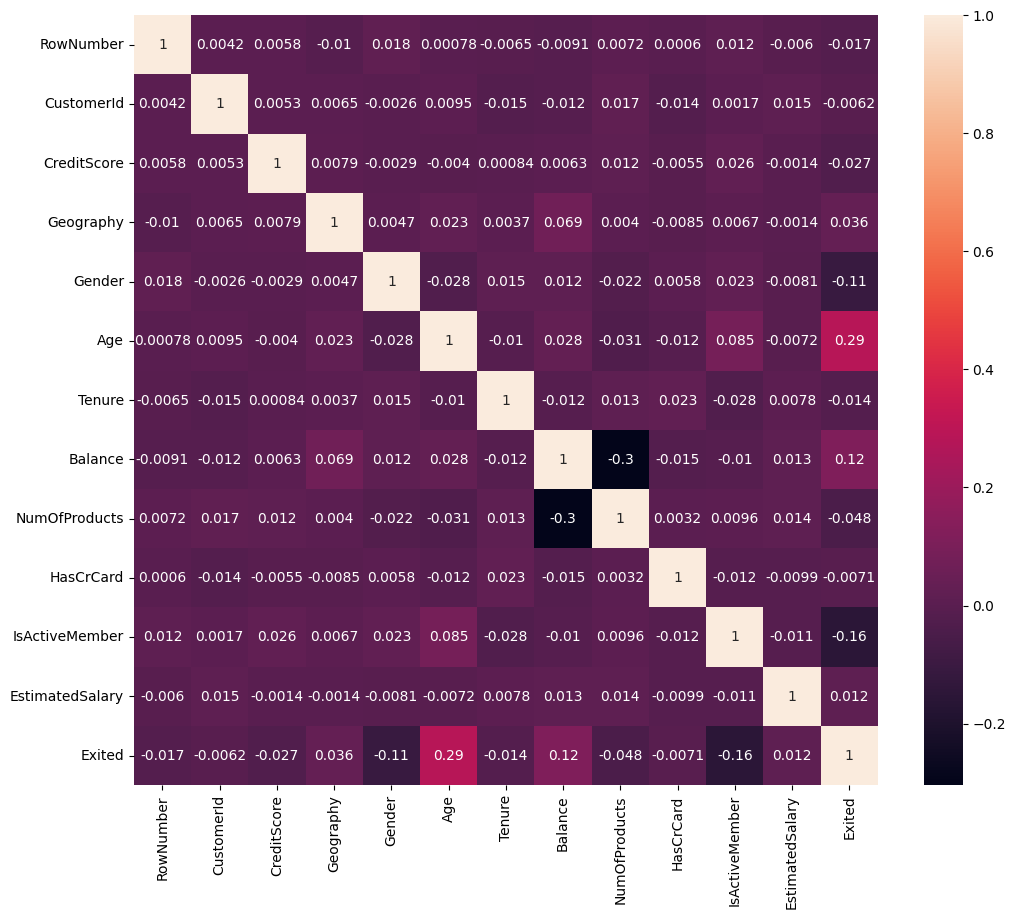

In [77]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True)

In [78]:
x=data.iloc[:,3:13]
y=data["Exited"]
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [79]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [99]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaledX_train = scaler.fit_transform(x)

In [100]:
model = Sequential()
model.add(Dense(256, input_dim=10, kernel_initializer='random_uniform', activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(128, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(64, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(16, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='random_uniform', activation='relu'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [101]:
Model=model.fit(scaledX_train, y, epochs=100, batch_size=50,  verbose=1)

Epoch 1/100
200/200 [==============================] - 0s 919us/step - loss: 0.5510 - accuracy: 0.7968
Epoch 2/100
200/200 [==============================] - 0s 967us/step - loss: 0.4282 - accuracy: 0.8127
Epoch 3/100
200/200 [==============================] - 0s 946us/step - loss: 0.3979 - accuracy: 0.8316
Epoch 4/100
200/200 [==============================] - 0s 949us/step - loss: 0.3814 - accuracy: 0.8465
Epoch 5/100
200/200 [==============================] - 0s 932us/step - loss: 0.3819 - accuracy: 0.8487
Epoch 6/100
200/200 [==============================] - 0s 942us/step - loss: 0.3854 - accuracy: 0.8466
Epoch 7/100
200/200 [==============================] - 0s 945us/step - loss: 0.3819 - accuracy: 0.8440
Epoch 8/100
200/200 [==============================] - 0s 944us/step - loss: 0.3750 - accuracy: 0.8495
Epoch 9/100
200/200 [==============================] - 0s 951us/step - loss: 0.3691 - accuracy: 0.8511
Epoch 10/100
200/200 [==============================] - 0s 930us/step - l

In [102]:
scores = model.evaluate(scaledX_train, y) 
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

313/313 [==============================] - 0s 543us/step - loss: 0.3122 - accuracy: 0.8698
accuracy: 86.98%
